In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
# the function that read the data from the csv file and return a dataframe
def read_data(file_name: str)-> pd.DataFrame:
    df = pd.read_csv(file_name)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# the function that gets the names of the directories under the specified directory
def get_subdirectories(directory: str)-> list:
    return [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

In [ ]:
# 
rstdir = "/workspaces/FxModelTest/Results"
dlst = get_subdirectories(rstdir)
for iloop, dname in enumerate(dlst):
    print(f"{iloop}: {dname}")

def get_csv_files(directory):
    return glob.glob(os.path.join(directory, "*.csv"))

In [6]:
files = get_csv_files(os.path.join(rstdir, dlst[0]))
get_base_dir = lambda ndir: get_csv_files(os.path.join(rstdir, dlst[ndir]))
get_rst_file = lambda ndir: [file for file in get_base_dir(ndir) if 'rst_' in file]

In [7]:
# Read the tsv file and return a pandas dataframe
def read_tsv_file(file_path: str)-> pd.DataFrame:
    data_columns = ['Date', 'Actual', 'Predict', 'ProbAboveZero', 'Std']
    df = pd.read_csv(file_path, sep='\t')
    df = df[data_columns]
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Read the csv file and return a pandas dataframe
def read_csv_file(file_path: str)-> pd.DataFrame:
    data_columns = ['Date', 'Actual', 'Predict', 'ProbAboveZero', 'Std']
    df = pd.read_csv(file_path)
    df = df[data_columns]
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [8]:
def gen_table_probrange_actcount(df:pd.DataFrame)->pd.DataFrame:
    years = range(2018,2024)
    AboveZero = []
    BelowZero = []
    ProbRange = []
    Year = []
    for yr in years:
        df_yr = df[df['Date'].dt.year == yr]
        for i in range(0, 10):
            Year.append(yr) 
            ProbRange.append(f'{i*10}%以上{(i+1)*10}%未満')
            df_tmp = df_yr[(df_yr['ProbAboveZero'] >= i*0.1) & (df_yr['ProbAboveZero'] < (i+1)*0.1)]
            AboveZero.append(len(df_tmp[df_tmp['Actual'] >=0]))
            BelowZero.append(len(df_tmp[df_tmp['Actual'] < 0]))

    data = {'Year':Year, 'ProbRange':ProbRange, 'AboveZero':AboveZero, 'BelowZero':BelowZero}

    return pd.DataFrame(data)

In [9]:
df_5daysMatern15 = read_csv_file(get_rst_file(0)[0])
count_df_5daysMatern15 = gen_table_probrange_actcount(df_5daysMatern15)
count_df_5daysMatern15.to_csv('5days_Matern15.csv')

df_20daysMatern15 = read_csv_file(get_rst_file(2)[0])
count_df_20daysMatern15 = gen_table_probrange_actcount(df_20daysMatern15)
count_df_20daysMatern15.to_csv('20days_Matern15.csv')

df_20daysMatern25 = read_csv_file(get_rst_file(3)[0])
count_df_20daysMatern25 = gen_table_probrange_actcount(df_20daysMatern25)
count_df_20daysMatern25.to_csv('20days_Matern25.csv')

df_5daysMatern25 = read_csv_file(get_rst_file(5)[0])
count_df_5daysMatern25 = gen_table_probrange_actcount(df_5daysMatern25)
count_df_5daysMatern25.to_csv('5days_Matern25.csv')

df_20daysMatern05 = read_csv_file(get_rst_file(6)[0])
count_df_20daysMatern05 = gen_table_probrange_actcount(df_20daysMatern05)
count_df_20daysMatern05.to_csv('20days_Matern05.csv')

df_5daysMatern05 = read_csv_file(get_rst_file(7)[0])
count_df_5daysMatern05 = gen_table_probrange_actcount(df_5daysMatern05)
count_df_5daysMatern05.to_csv('5days_Matern05.csv')

df_20daysPeriodic = read_csv_file(get_rst_file(8)[0])
count_df_20daysPeriodic = gen_table_probrange_actcount(df_20daysPeriodic)
count_df_20daysPeriodic.to_csv('20days_Periodic.csv')

df_5daysPeriodic = read_csv_file(get_rst_file(9)[0])
count_df_5daysPeriodic = gen_table_probrange_actcount(df_5daysPeriodic)
count_df_5daysPeriodic.to_csv('5days_Periodic.csv')


In [10]:
def draw_graph_act_vs_pred(df:pd.DataFrame) -> None:
    fig, ax = plt.subplots(3,2, figsize=(10,15))

    years = range(2018,2024) # 2018年から2023年までのデータを表示

    for i, year in enumerate(years):
        df_year = df[df['Date'].dt.year == year]
        # actual vs predict の散布図を描く
        ax[i//2, i%2].scatter(df_year['Actual'], df_year['Predict'])
        # ４５度の直線を追加する
        ax[i//2, i%2].plot([df_year['Actual'].min(), df_year['Actual'].max()], [df_year['Actual'].min(), df_year['Actual'].max()], color='red')
        # グラフのタイトルと軸ラベルを設定
        ax[i//2, i%2].set_title(f'Scatter plot of Actual and Prediction in {year}')
        ax[i//2, i%2].set_xlabel('Actual')
        ax[i//2, i%2].set_ylabel('Prediction')
        ax[i//2, i%2].grid(True)

    # グラフを表示
    plt.tight_layout()
    plt.show()

# グラフを描く
def draw_graph_prob_vs_act(df:pd.DataFrame) -> None:
    
    fig, ax = plt.subplots(3,2, figsize=(10,15))

    years = range(2018,2024) # 2018年から2023年までのデータを表示

    for i, year in enumerate(years):
        df_year = df[df['Date'].dt.year == year]
        # probAboveZero vs actual の散布図を描く
        ax[i//2, i%2].scatter(df_year['ProbAboveZero'], df_year['Actual'])
        ax[i//2, i%2].scatter(df_year['ProbAboveZero'], df_year['Predict'])
        
        # 水平線を描く
        ax[i//2, i%2].plot([0, 1], [0, 0], color='red')

        # グラフのタイトルと軸ラベルを設定
        ax[i//2, i%2].set_title(f'Scatter plot of ProbAboveZero and Actual in {year}')
        ax[i//2, i%2].set_xlabel('ProbAboveZero')
        ax[i//2, i%2].set_ylabel('Actual')
        ax[i//2, i%2].grid(True)

    # グラフを表示
    plt.tight_layout()
    plt.show()

    

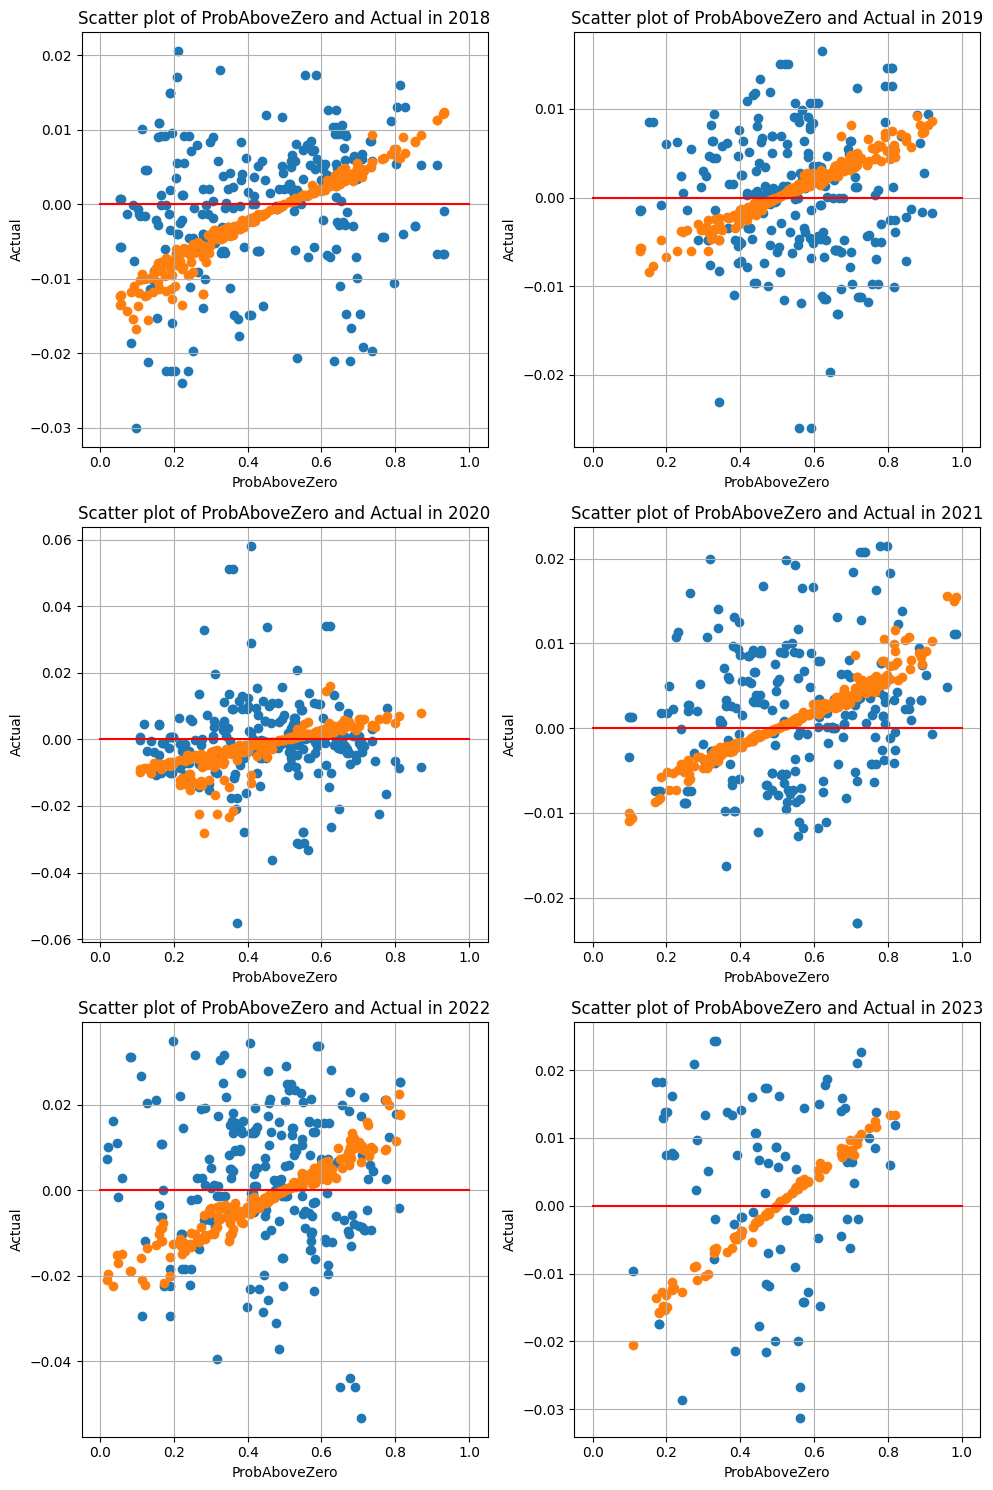

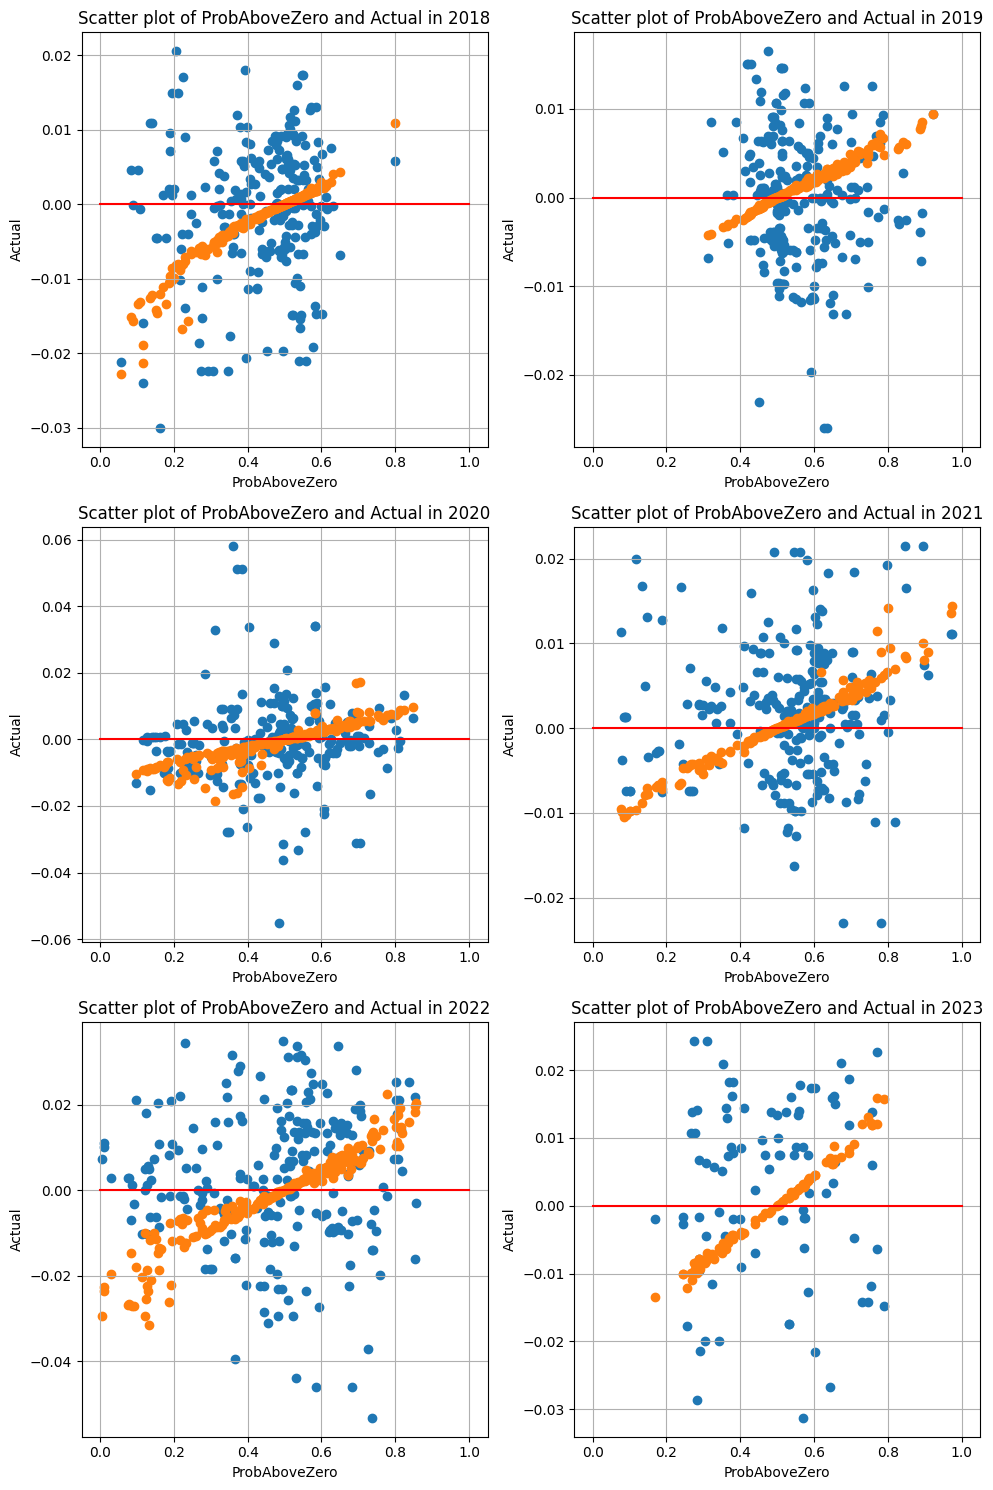

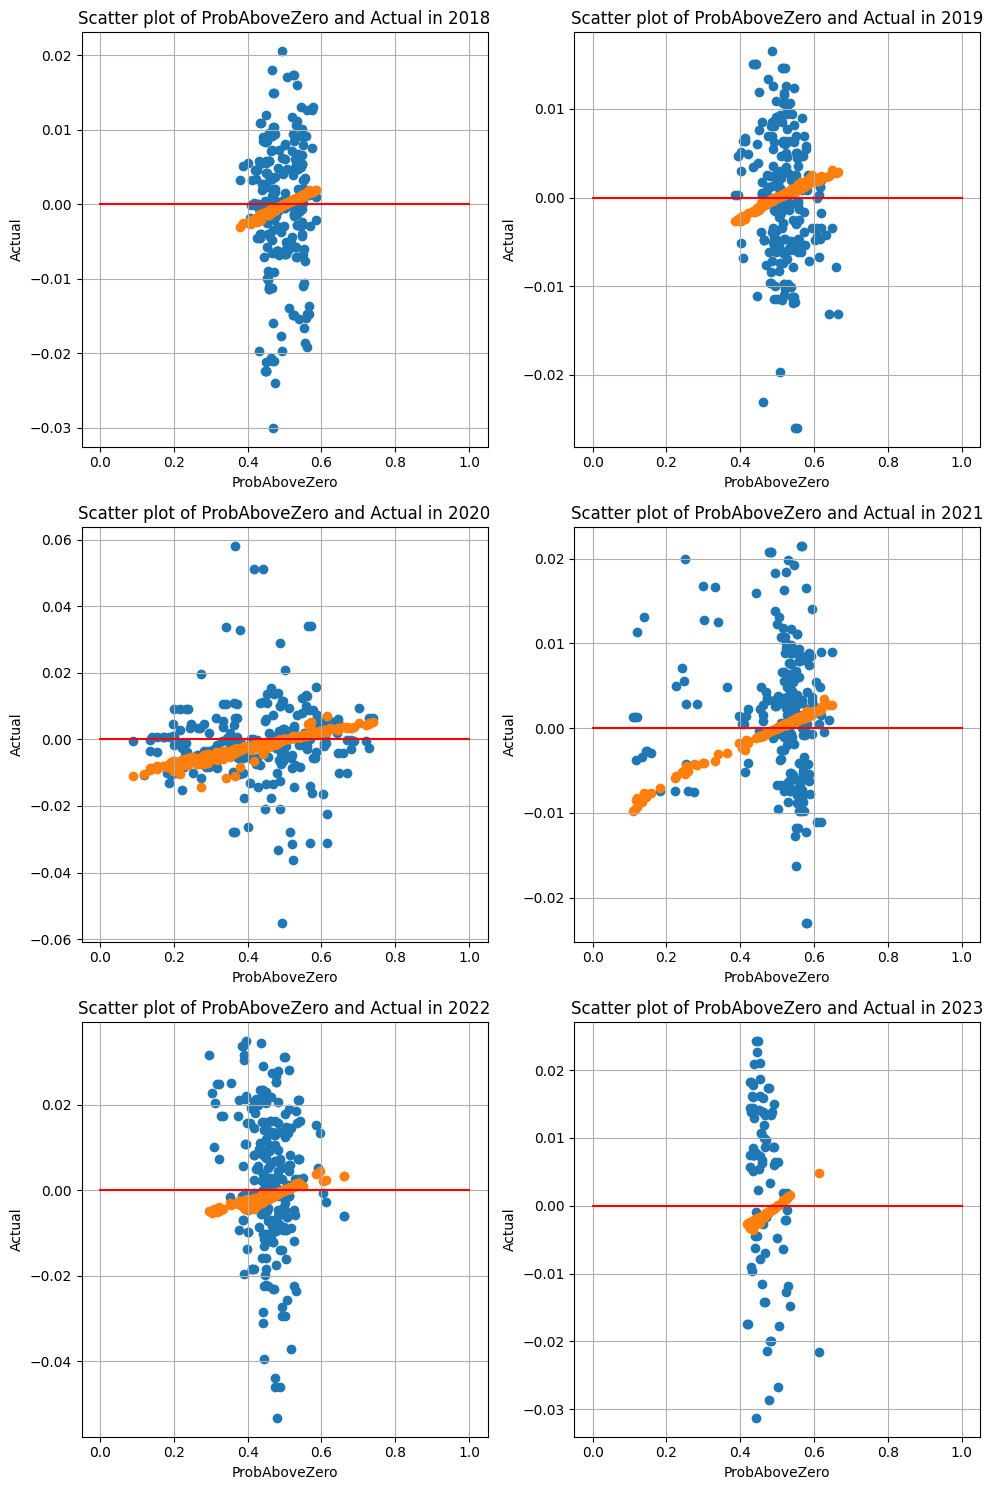

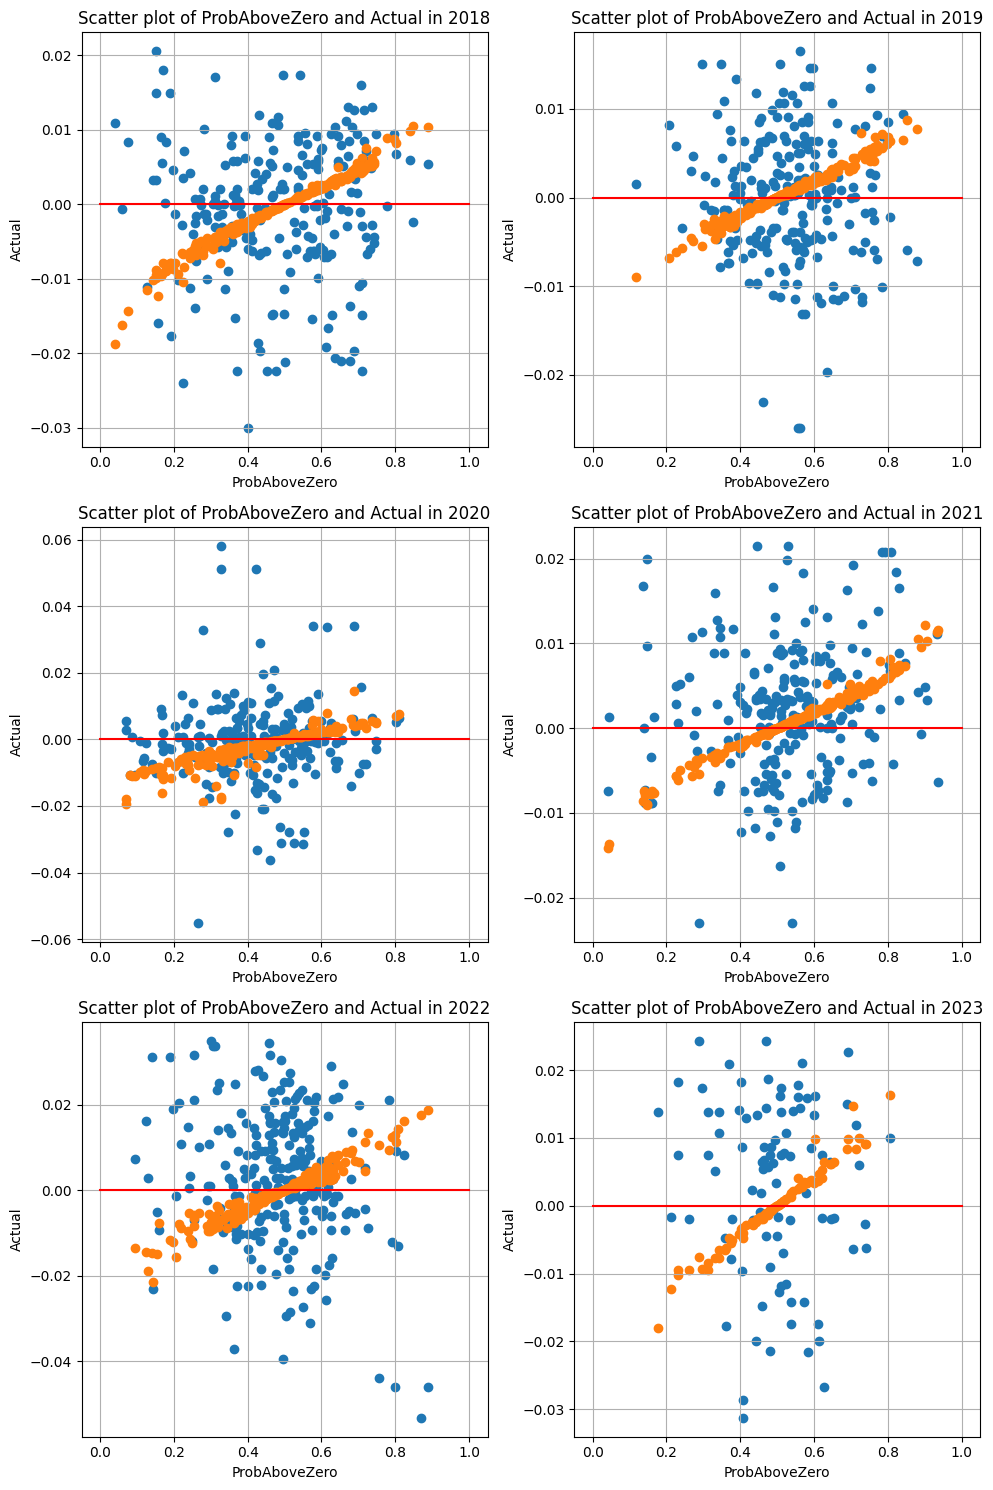

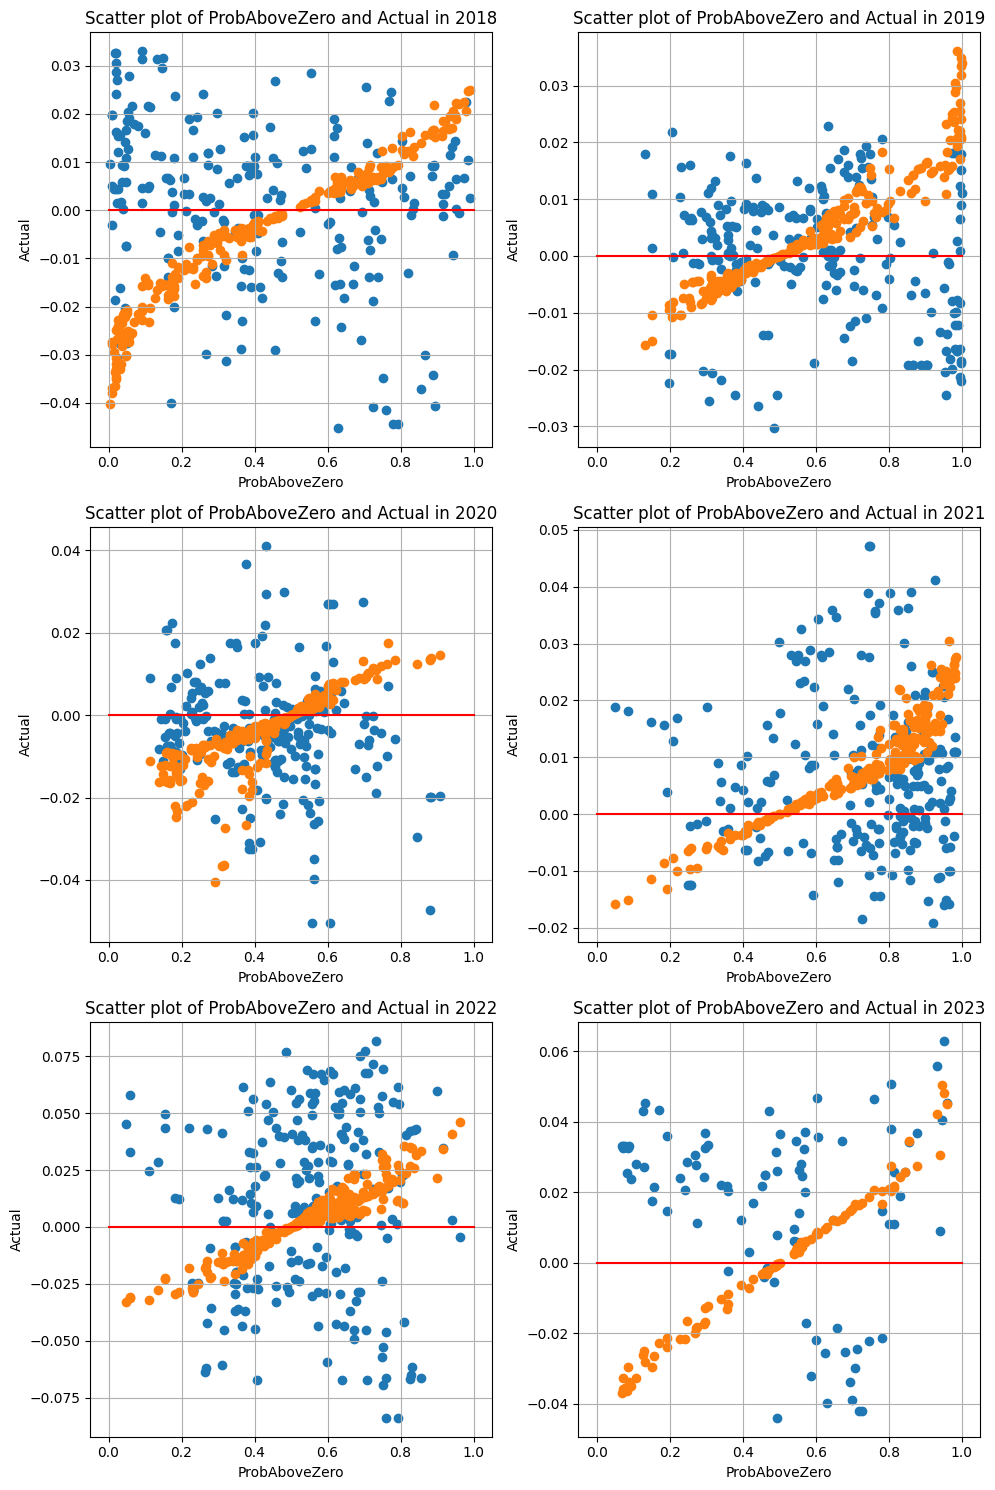

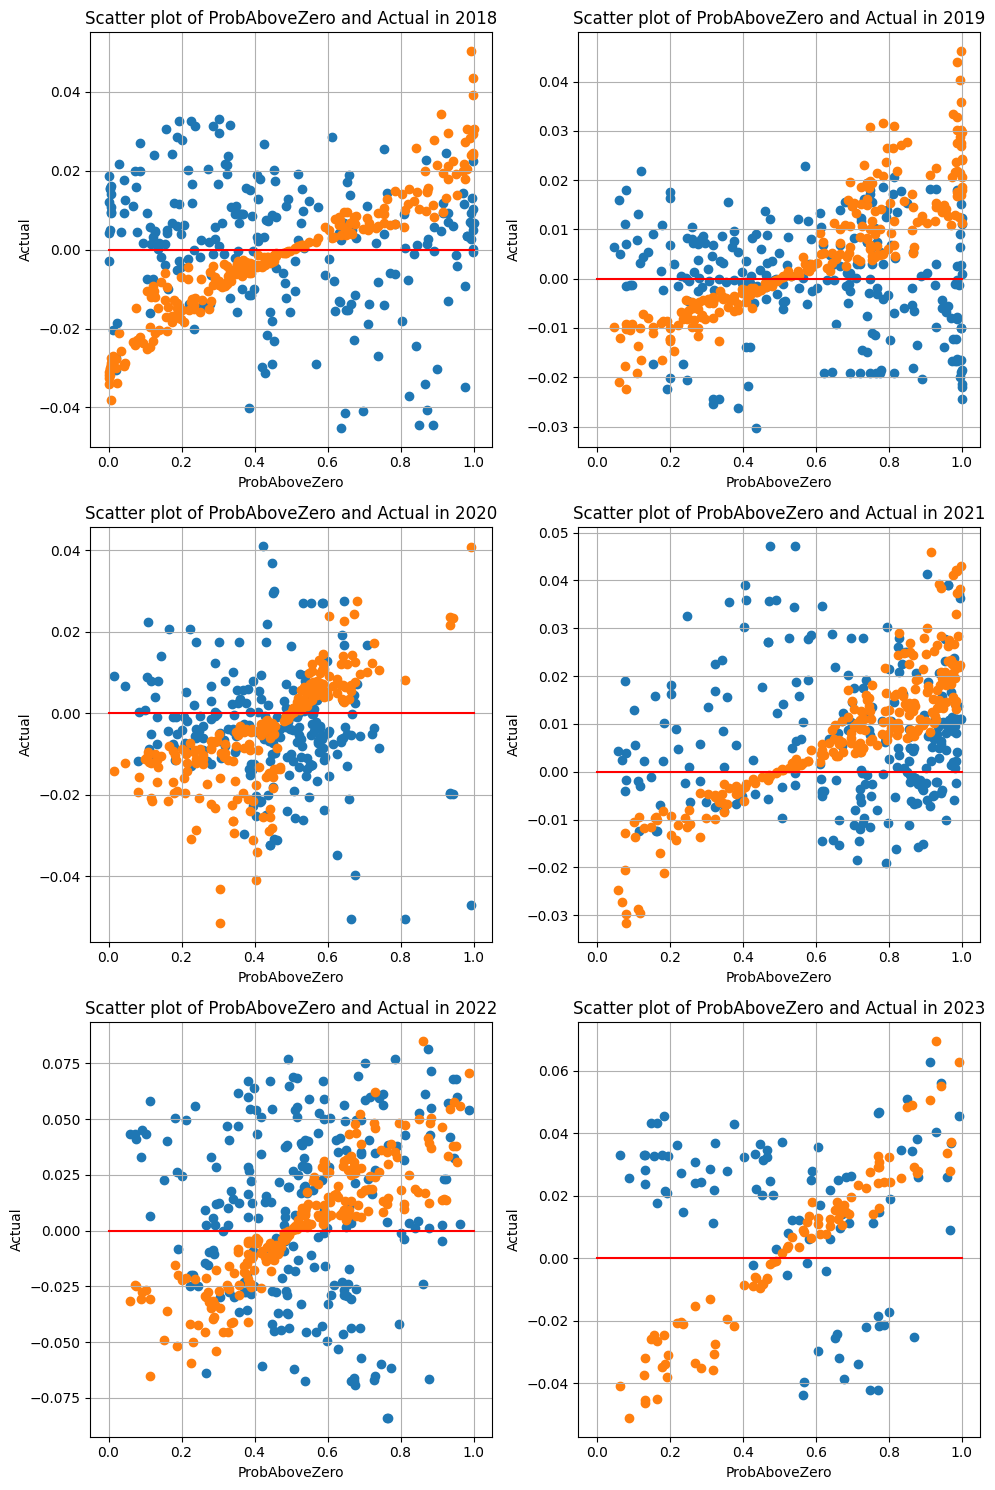

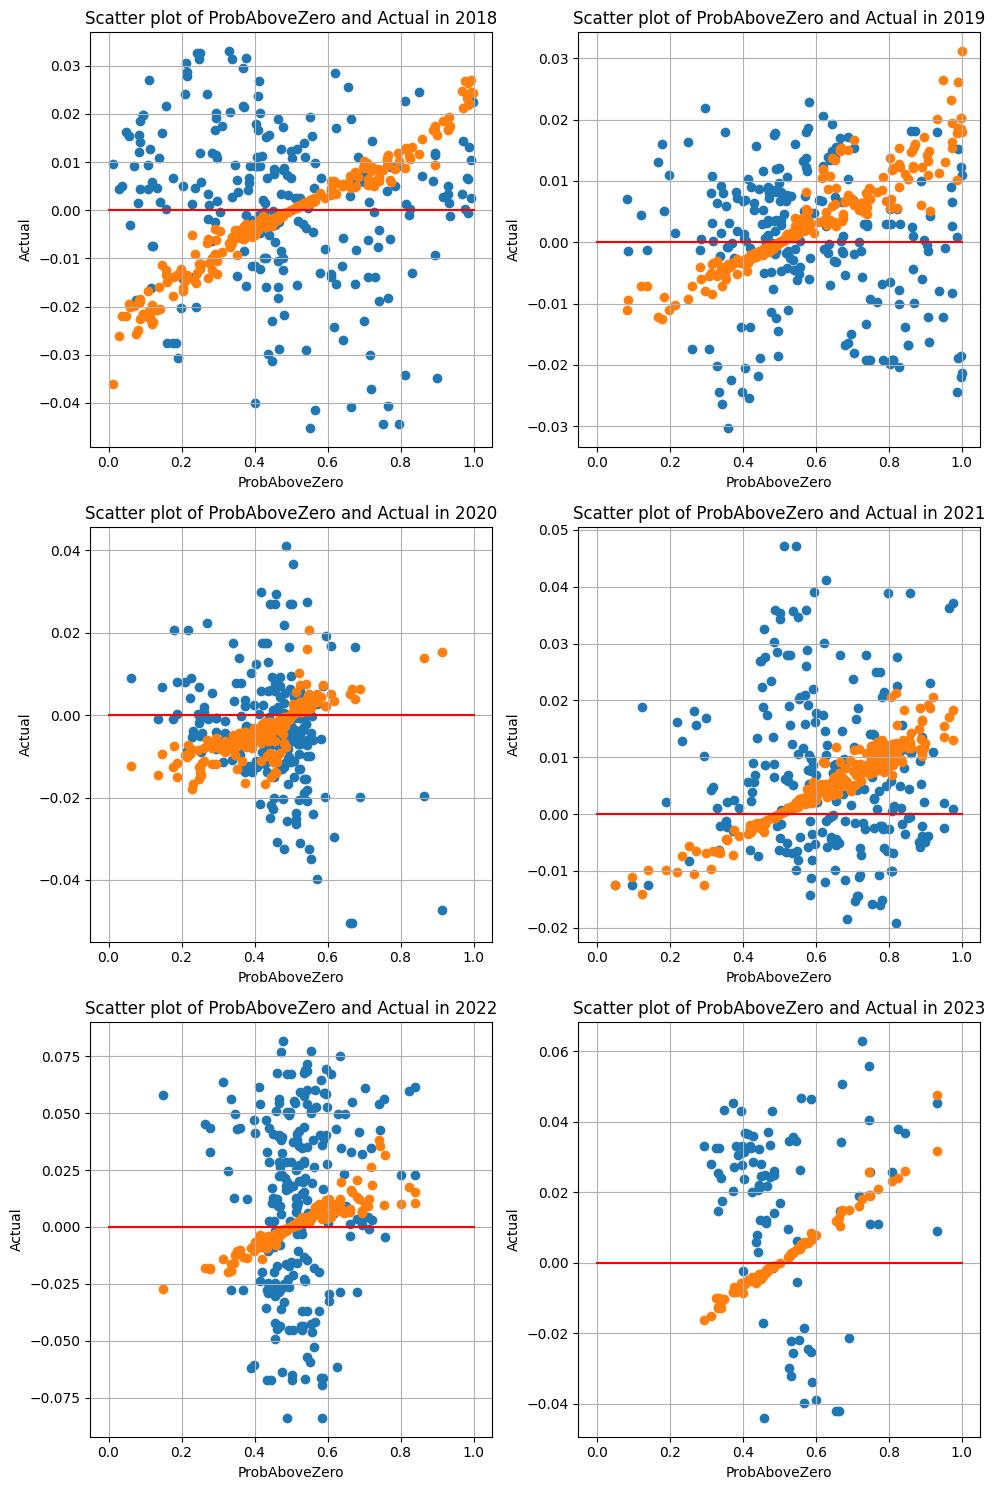

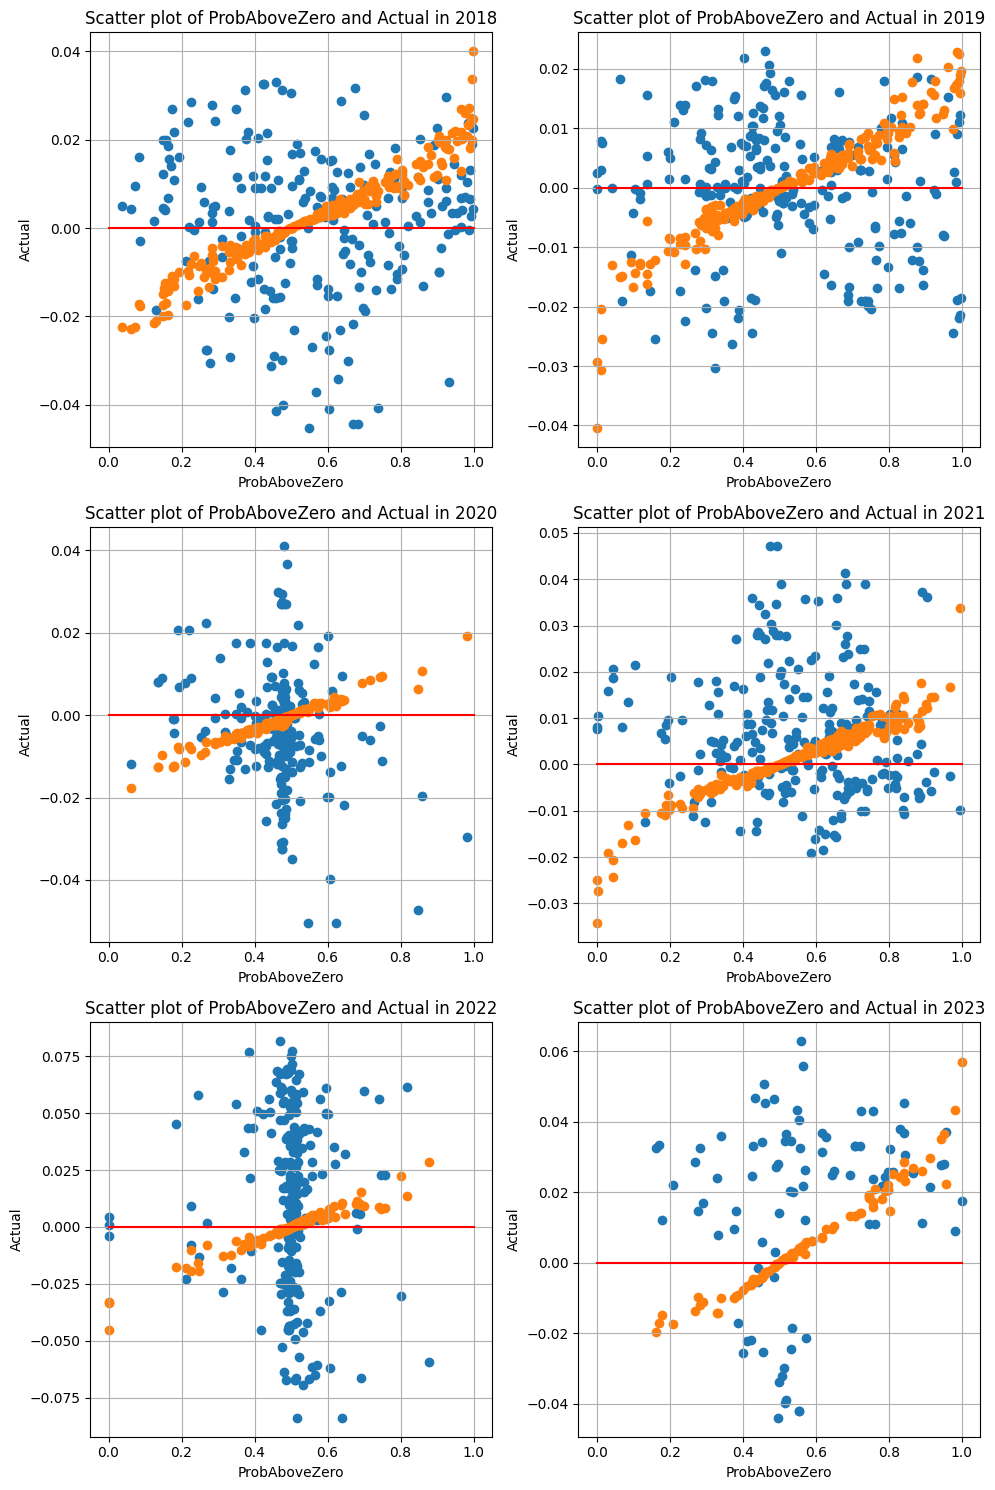

In [11]:
#
draw_graph_prob_vs_act(df_5daysMatern05)
#
draw_graph_prob_vs_act(df_5daysMatern15)
#
draw_graph_prob_vs_act(df_5daysMatern25)
#
draw_graph_prob_vs_act(df_5daysPeriodic)
#
draw_graph_prob_vs_act(df_20daysMatern05)
#
draw_graph_prob_vs_act(df_20daysMatern15)
#
draw_graph_prob_vs_act(df_20daysMatern25)
#
draw_graph_prob_vs_act(df_20daysPeriodic)


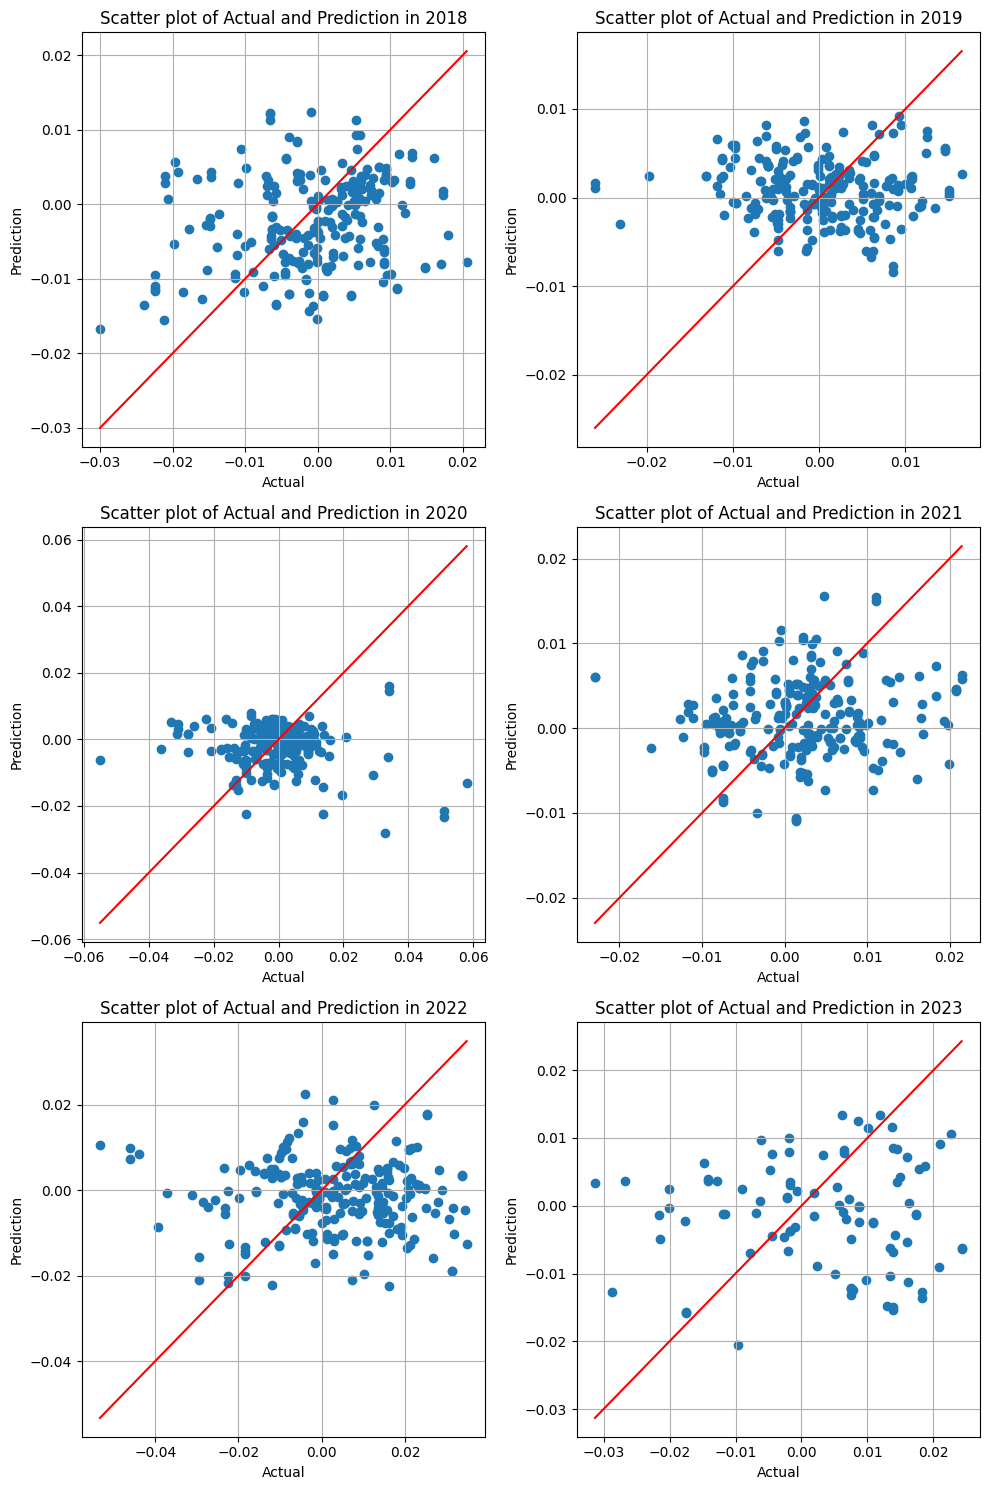

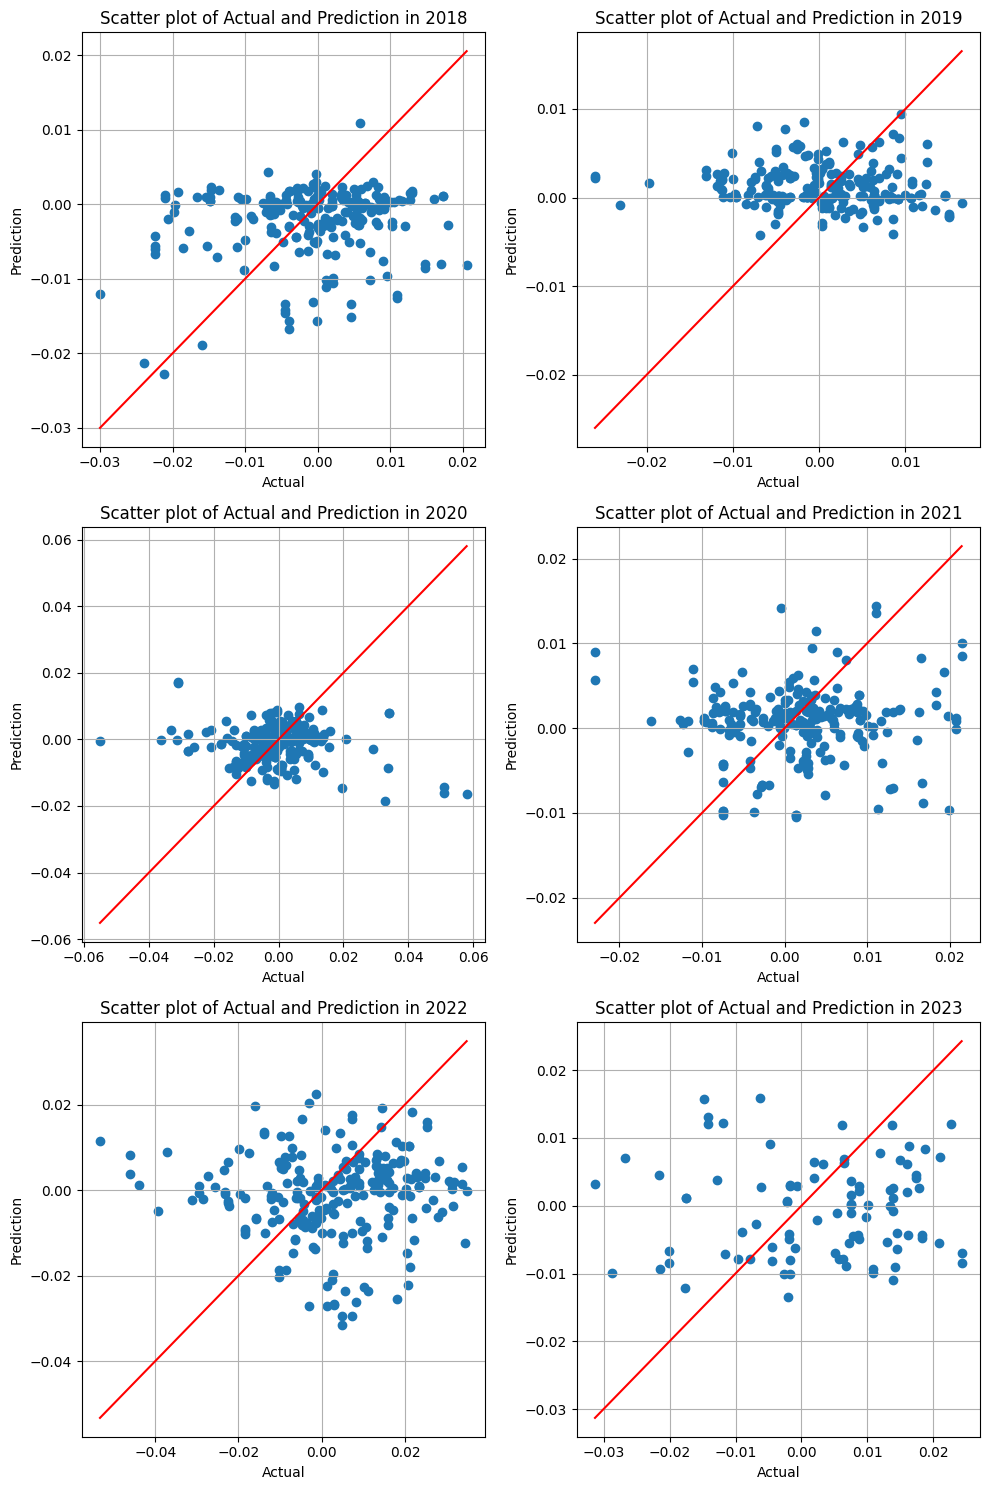

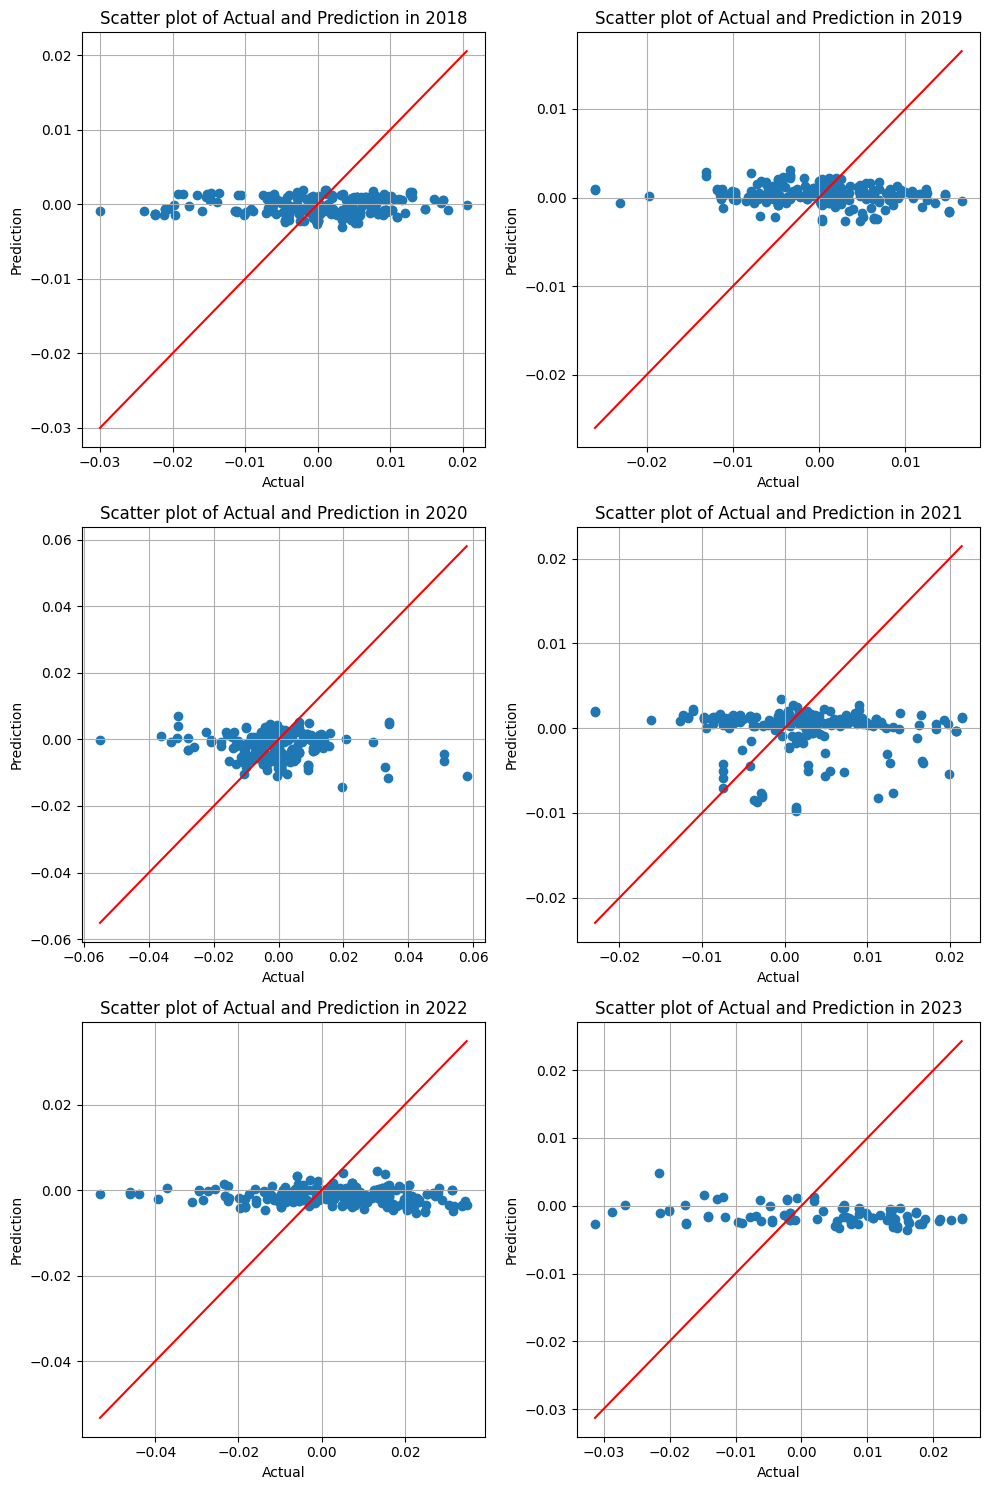

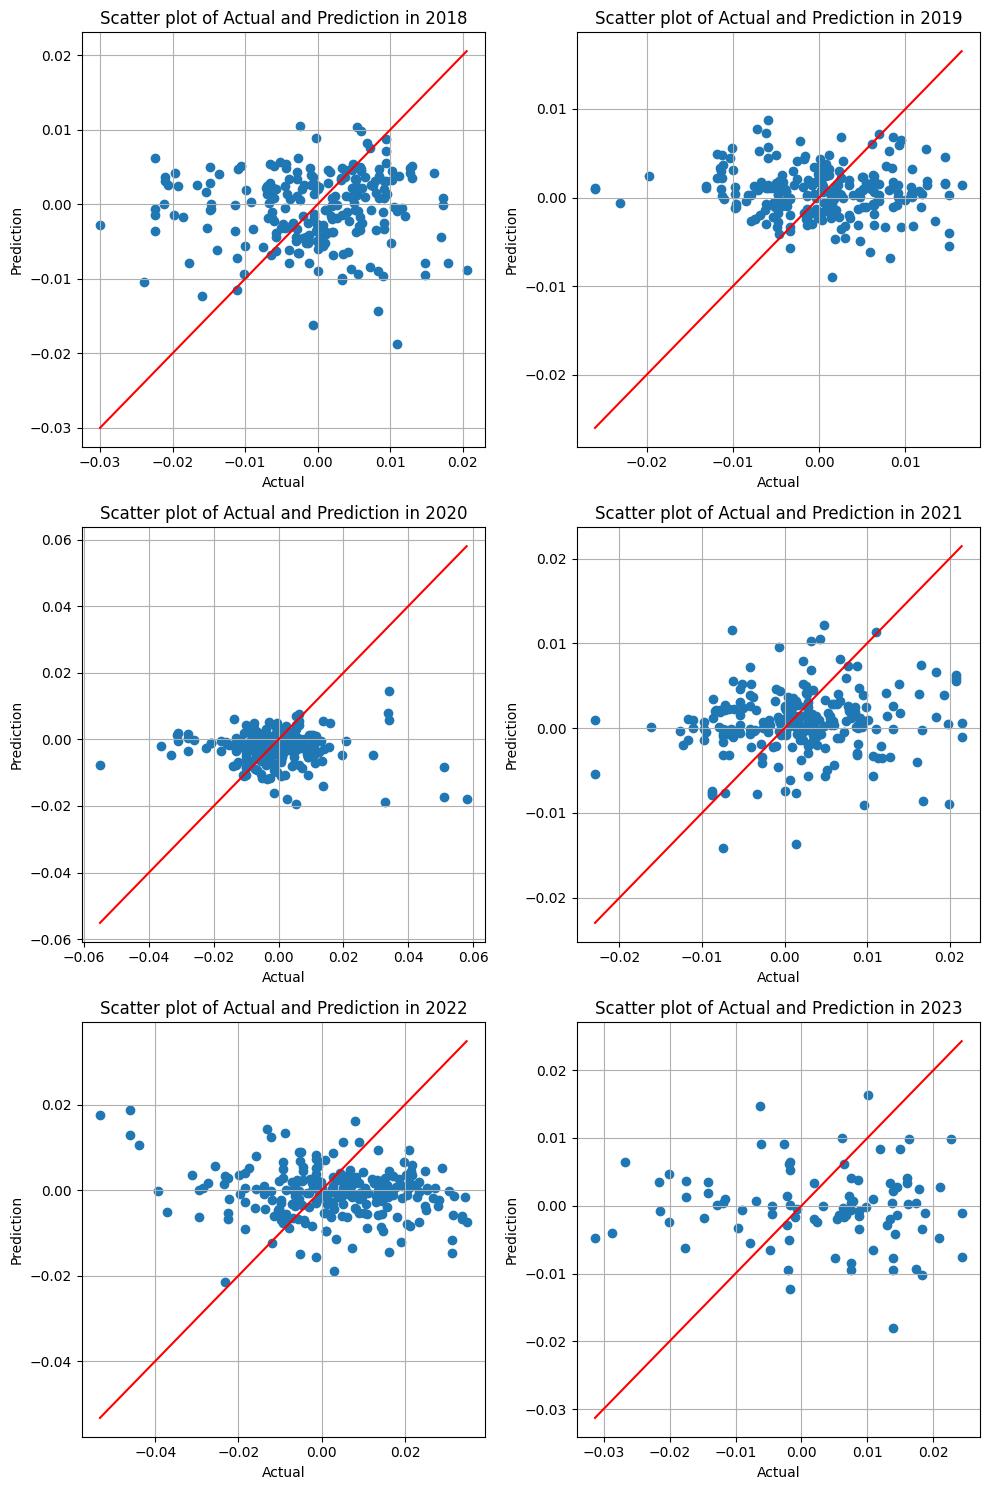

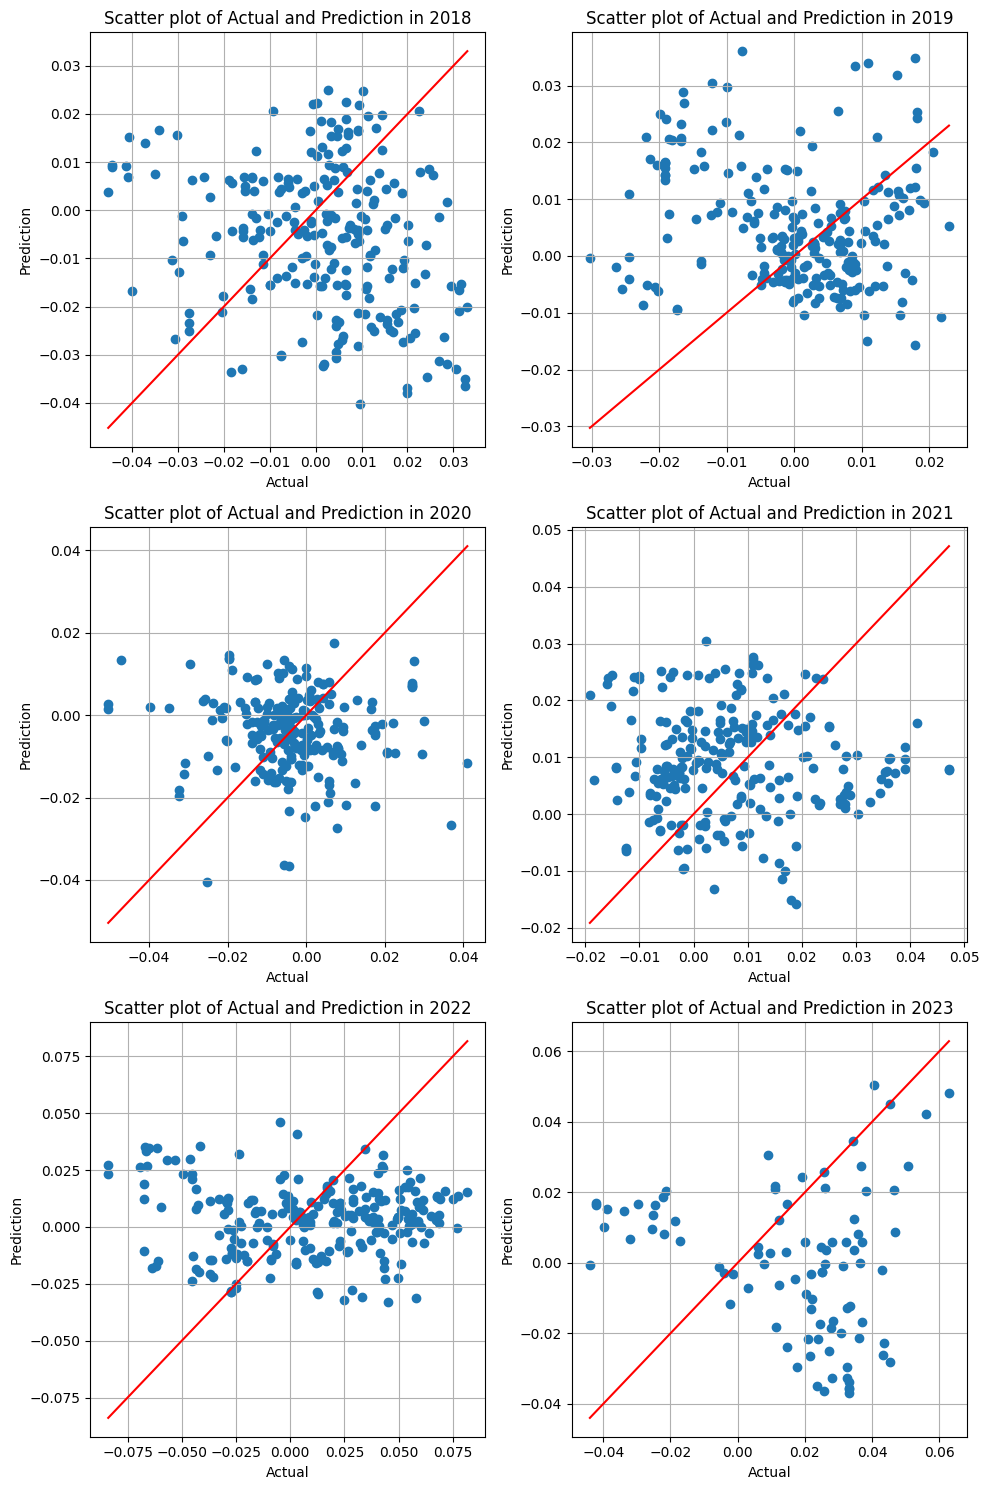

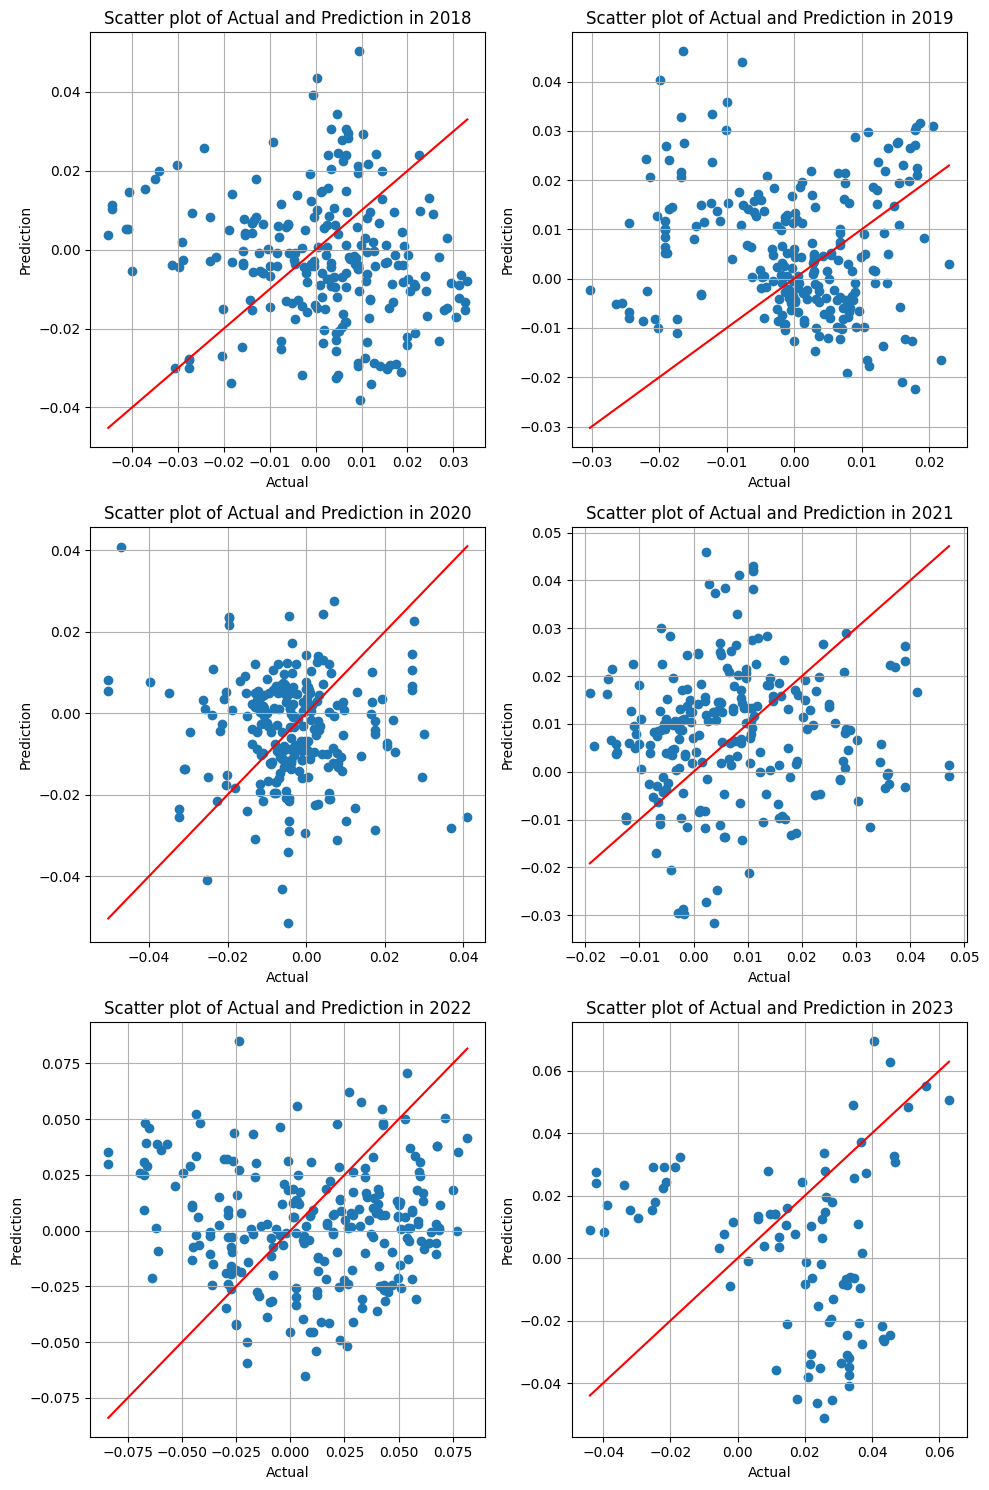

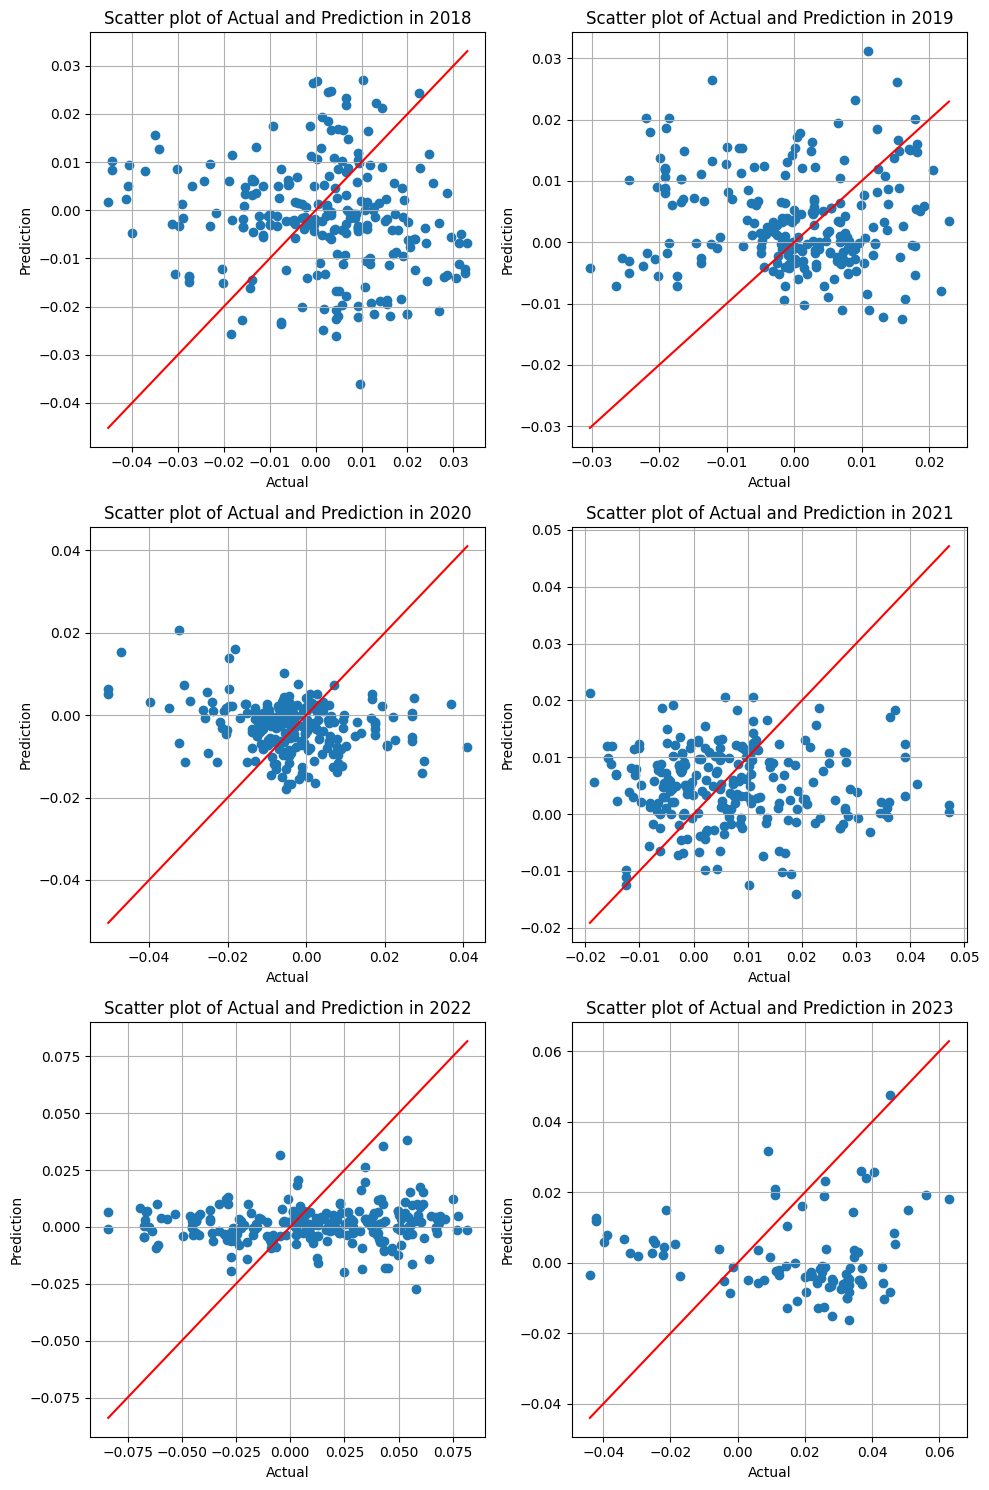

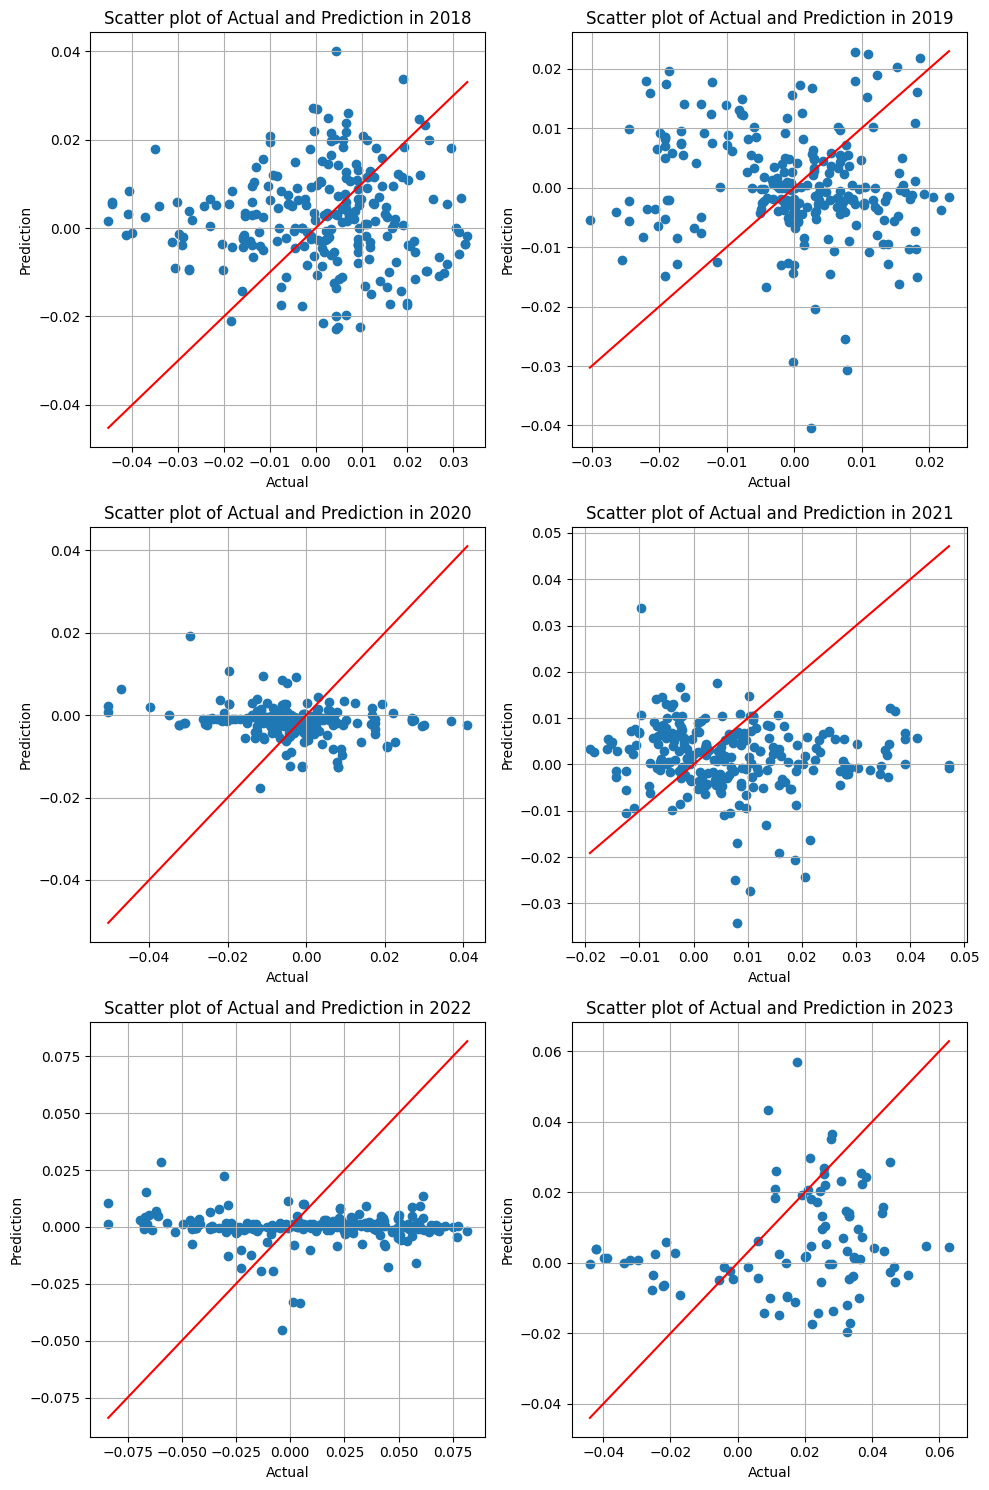

In [12]:
#
draw_graph_act_vs_pred(df_5daysMatern05)
#
draw_graph_act_vs_pred(df_5daysMatern15)
#
draw_graph_act_vs_pred(df_5daysMatern25)
#
draw_graph_act_vs_pred(df_5daysPeriodic)
#
draw_graph_act_vs_pred(df_20daysMatern05)
#
draw_graph_act_vs_pred(df_20daysMatern15)
#
draw_graph_act_vs_pred(df_20daysMatern25)
#
draw_graph_act_vs_pred(df_20daysPeriodic)